In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv("E:\study material\programming\ML\Datasets\\train.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
x_value= dataset.drop(['Name', 'Survived', 'PassengerId'], axis= 1)
x_value.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,female,35.0,1,0,113803,53.1000,C123,S
4,3,male,35.0,0,0,373450,8.0500,NaN,S


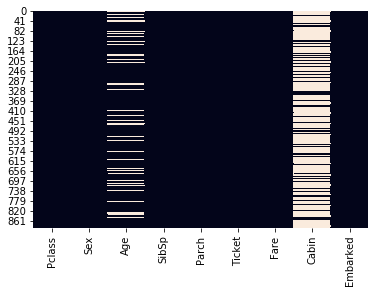

In [5]:
sns.heatmap(x_value.isnull(),cbar=False)

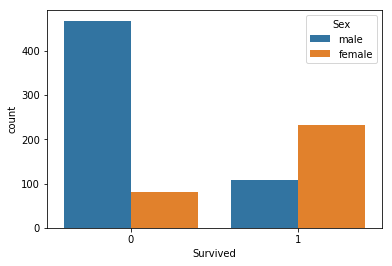

In [6]:
sns.countplot(x='Survived',hue='Sex',data=dataset)

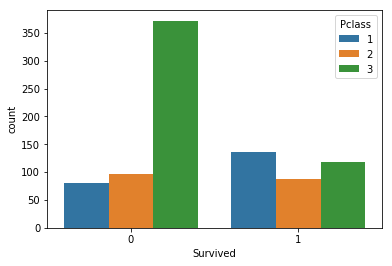

In [7]:
sns.countplot(x= 'Survived', hue='Pclass', data=dataset)

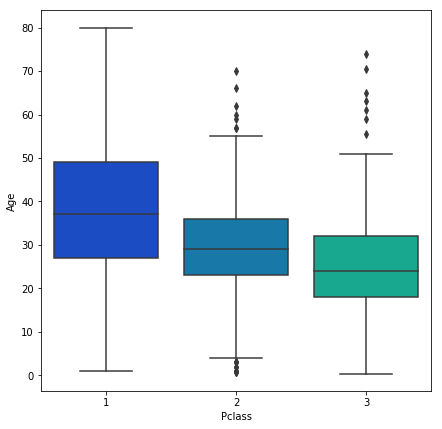

In [8]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Pclass',y='Age',data=x_value,palette='winter')

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age    

In [10]:
x_value['Age'] = x_value[['Age','Pclass']].apply(impute_age,axis=1)

In [11]:
x_value= x_value.drop(['Cabin'], axis=1)

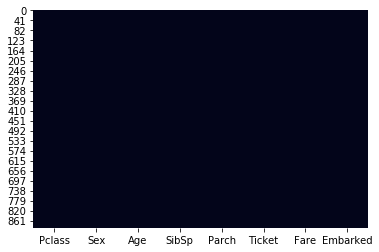

In [12]:
sns.heatmap(x_value.isnull(),cbar=False)

In [13]:
x_value.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S


In [14]:
x_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [15]:
from sklearn import preprocessing

label= preprocessing.LabelEncoder()
x_value['Sex']= label.fit_transform(x_value['Sex'])


In [16]:
embark = pd.get_dummies(x_value['Embarked'])

In [17]:
x_value= x_value.drop(['Embarked', 'Ticket'], axis=1)

In [18]:
x_value = pd.concat([x_value,embark],axis=1)

In [19]:
x_value.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1


In [20]:
y_value= dataset['Survived']

In [21]:
from sklearn.preprocessing import StandardScaler

scalar= StandardScaler()
scalar.fit(x_value)


D:\ML\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_features= scalar.transform(x_value)

x_train= pd.DataFrame(scaled_features,columns=x_value.columns)
x_train.head()

D:\ML\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.827377,0.737695,-0.533834,0.432793,-0.473674,-0.502445,-0.482043,-0.307562,0.619306
1,-1.566107,-1.355574,0.674891,0.432793,-0.473674,0.786845,2.074505,-0.307562,-1.614710
2,0.827377,-1.355574,-0.231653,-0.474545,-0.473674,-0.488854,-0.482043,-0.307562,0.619306
3,-1.566107,-1.355574,0.448255,0.432793,-0.473674,0.420730,-0.482043,-0.307562,0.619306
4,0.827377,0.737695,0.448255,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.619306


In [23]:
x= pd.read_csv("E:\study material\programming\ML\Datasets\\test.csv")

In [24]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [26]:
x= x.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [27]:
label1= preprocessing.LabelEncoder()
x['Sex']= label.fit_transform(x['Sex'])

In [28]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [29]:
embark1 = pd.get_dummies(x['Embarked'])
embark1.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [30]:
x= x.drop(['Embarked'], axis=1)
len(x), len(embark1)

(418, 418)

In [31]:
x= pd.concat([x, embark1], axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [32]:
len(x)

418

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass    418 non-null int64
Sex       418 non-null int32
Age       332 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 19.3 KB


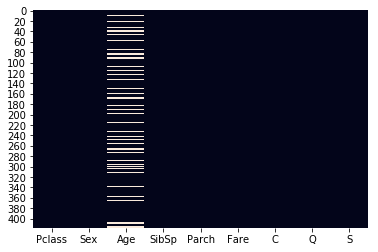

In [34]:
sns.heatmap(x.isnull(),cbar=False)

In [35]:
x['Age'] = x[['Age','Pclass']].apply(impute_age,axis=1)

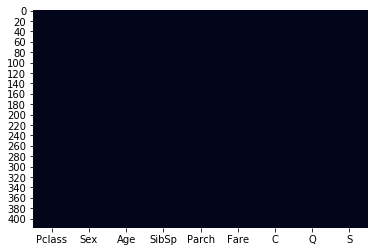

In [36]:
sns.heatmap(x.isnull(),cbar=False)

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass    418 non-null int64
Sex       418 non-null int32
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 19.3 KB


In [49]:
m= np.mean(x['Fare'])
m

35.6271884892086

In [55]:
x= x.fillna(m)

In [56]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
C         0
Q         0
S         0
dtype: int64

In [57]:
scalar= StandardScaler()
scalar.fit(x)

D:\ML\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
scaled_features= scalar.transform(x)

x_test= pd.DataFrame(scaled_features,columns=x.columns)
x_test.head()

D:\ML\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.873482,0.755929,0.401768,-0.499470,-0.400248,-0.498407,-0.568142,2.843757,-1.350676
1,0.873482,-1.322876,1.371615,0.616992,-0.400248,-0.513274,-0.568142,-0.351647,0.740370
2,-0.315819,0.755929,2.535433,-0.499470,-0.400248,-0.465088,-0.568142,2.843757,-1.350676
3,0.873482,0.755929,-0.180141,-0.499470,-0.400248,-0.483466,-0.568142,-0.351647,0.740370
4,0.873482,-1.322876,-0.568080,0.616992,0.619896,-0.418471,-0.568142,-0.351647,0.740370


# Support Vector machine

In [92]:
from sklearn.svm import SVC

model= SVC()

In [93]:
model.fit(x_train, y_value)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [94]:
y_test= pd.read_csv("E:\study material\programming\ML\Datasets\\gender_submission.csv")

In [95]:
y= y_test.drop(['PassengerId'], axis=1)

In [96]:
pred= model.predict(x_test)

In [99]:
s= pd.read_csv("E:\study material\programming\ML\Datasets\\test.csv")

submission = pd.DataFrame({
        "PassengerId": s["PassengerId"],
        "Survived": pred
    })

submission.to_csv('submission.csv', index=False)  

0.78 accuracy

# Decision tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier(criterion= 'entropy')

dtree.fit(x_train, y_value)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
pred2= dtree.predict(x_test)

In [103]:
submission = pd.DataFrame({
        "PassengerId": s["PassengerId"],
        "Survived": pred2
    })

submission.to_csv('submissiontree.csv', index=False) 

0.68 accuracy